# Défi open data : Décision agricole

**Les productions agricoles sont fortement déterminées par les conditions météorologiques**, tout au long du cycle cultural :
* la croissance des plantes est principalement pilotée par l’accumulation des températures ;
* les besoins en irrigation dépendent des réserves en eau dans le sol (constituées lors des précipitations antérieures) ;
* le développement d’une maladie peut résulter de l’accumulation de certaines conditions météorologiques ;
* etc.

**La problématique**

Ce projet vous propose **d’exploiter les données publiques météorologiques pour informer la prise de décision dans le domaine agricole**.

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/6639e67fa95c6e4f1da70e39/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

# Importer des données
Nous mettons à disposition une fonction utilitaire qui permet de charger la majorité des ressources de data.gouv.fr à partir de leur identifiant sur le site (exemple : `"2876a346-d50c-4911-934e-19ee07b0e503"`). Vous pouvez l'utiliser comme suit :

In [1]:
from utils import load_table_from_resource_id

df = load_table_from_resource_id('cb51408e-2b97-43a4-94e2-c0de5c3bf5b2')
df

Info : ce fichier zippé contient plusieurs fichiers, ouverture du plus large : produits_usages_utf8.csv


C:\Users\Dinum\Documents\Projets\tests\odu-notebooks\utils.py:44: DtypeWarning: Columns (0,14) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(


,numero AMM,nom produit,identifiant usage,date decision,stade cultural min (BBCH),tade cultural max (BBCH),etat usage,dose retenue,dose retenue unite,delai avant recolte jour,...,nombre max d'application,date fin distribution,date fin utilisation,condition emploi,ZNT aquatique (en m),ZNT arthropodes non cibles (en m),ZNT plantes non cibles (en m),mentions autorisees,intervalle minimum entre applications (jour),Unnamed: 20
0,8800006,DIMATE BF 400,Artichaut*Trt Part.Aer.*Pucerons,26/09/2012,NaN,NaN,Retrait,0.60,L/ha,NaN,...,3.0,31/03/2013,31/03/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8800006,DIMATE BF 400,Carotte*Trt Part.Aer.*Mouches,NaN,NaN,NaN,Retrait,0.50,L/ha,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8800006,DIMATE BF 400,Chicorées - Production de racines*Trt Sol*Mouches,NaN,NaN,NaN,Retrait,0.75,L/ha,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8800006,DIMATE BF 400,Choux*Trt Part.Aer.*Pucerons,NaN,NaN,NaN,Retrait,0.60,L/ha,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8800006,DIMATE BF 400,Laitue*Trt Part.Aer.*Pucerons,NaN,NaN,NaN,Retrait,0.60,L/ha,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81735,2190686/2161101,REVYSTAR XL + PRIAXOR EC,Orge*Trt Part.Aer.*Rhynchosporiose,28/04/2021,30.0,59.0,Autorisé,1.50,L/ha,35.0,...,1.0,NaN,NaN,"REVYSTAR XL 0,75 L/ha + PRIAXOR EC 0,75 L/ha. ...",20.0,NaN,NaN,NaN,NaN,NaN
81736,2100037/2010280,FILAN SC + CARAMBA STAR,Crucifères oléagineuses*Trt Part.Aer.*Oïdium(s),09/10/2015,NaN,NaN,Retrait,NaN,NaN,56.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81737,2100037/2010280,FILAN SC + CARAMBA STAR,Crucifères oléagineuses*Trt Part.Aer.*Scléroti...,09/10/2015,NaN,NaN,Retrait,NaN,NaN,56.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81738,2060088 - 2100111,CAMIX + ELUMIS,Maïs*Désherbage,25/03/2022,12.0,14.0,Autorisé,3.10,L/ha,NaN,...,1.0,NaN,NaN,Uniquement sur mais.,20.0,NaN,5.0,NaN,NaN,NaN


# Exemple de réalisation : évolution des surfaces d'agriculture bio par culture

In [82]:
from io import BytesIO
import requests
import zipfile
import gzip
import geopandas as gpd
import pandas as pd
import plotly.express as px

In [54]:
# on récupère les fichiers nationaux les plus récents et anciens (geojson.gz et gpkg.zip)
content = requests.get('https://www.data.gouv.fr/fr/datasets/r/a0d9e304-97d0-4871-ad32-70a5c47aa71d').content
with gzip.open(BytesIO(content), 'r') as f:
    df_2019 = gpd.read_file(f)
df_2019['SURFACE_HA'] = df_2019['SURFACE_HA'].astype(float)
df_2019

,MILLESIME,BIO,CODE_CULTU,LBL_CULTU,GRP_CULTU,SURFACE_HA,geometry
0,2019.0,1.0,VRG,Verger,Vergers,0.40,"POLYGON ((-6263686.642 6119214.074, -6263644.4..."
1,2019.0,1.0,VRG,Verger,Vergers,0.44,"POLYGON ((-6263666.402 6119142.639, -6263634.5..."
2,2019.0,1.0,VRG,Verger,Vergers,0.24,"POLYGON ((-6263592.086 6119007.742, -6263541.1..."
3,2019.0,1.0,VRG,Verger,Vergers,0.21,"POLYGON ((-6263607.374 6119027.623, -6263596.0..."
4,2019.0,1.0,SPH,Surface pastorale - herbe prédominante et ress...,Estives et landes,3.01,"POLYGON ((-6263600.840 6119000.949, -6263699.2..."
...,...,...,...,...,...,...,...
823816,2019.0,1.0,OLI,Oliveraie,Oliviers,0.53,"POLYGON ((1220904.568 6193163.615, 1220903.510..."
823817,2019.0,1.0,SNE,Surface agricole temporairement non exploitée,Divers,0.79,"POLYGON ((1216162.411 6159010.181, 1216146.272..."
823818,2019.0,1.0,SNE,Surface agricole temporairement non exploitée,Divers,1.44,"POLYGON ((1236904.061 6154722.606, 1236914.561..."
823819,2019.0,1.0,SNE,Surface agricole temporairement non exploitée,Divers,3.99,"POLYGON ((1235990.434 6161777.538, 1235980.116..."


In [45]:
content = requests.get('https://www.data.gouv.fr/fr/datasets/r/36314eff-2712-4d6a-b091-7752a5b318bb').content
z = zipfile.ZipFile(BytesIO(content))
df_2022 = gpd.read_file(z.open('rpg-bio-2022-national.gpkg'), sep=';')
df_2022

,gid,millesime,code_culture,lbl_culture,grp_culture,surface_ha,code_commune_insee,lbl_commune,code_epci,code_departement,code_region,zone_geo,geometry
0,4420687,2022,PPH,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,0.38,38513,Treffort,200030658.0,38,84,France mét.,"MULTIPOLYGON (((5.67141 44.90419, 5.67144 44.9..."
1,333,2022,PTR,Autre prairie temporaire de 5 ans ou moins,Prairies temporaires,2.13,01188,Illiat,200070118.0,01,84,France mét.,"MULTIPOLYGON (((4.87139 46.18659, 4.87152 46.1..."
2,337,2022,BTH,Blé tendre d’hiver,Blé tendre,6.10,01136,Cruzilles-lès-Mépillat,200070555.0,01,84,France mét.,"MULTIPOLYGON (((4.87175 46.22321, 4.87171 46.2..."
3,464,2022,BTH,Blé tendre d’hiver,Blé tendre,1.32,01285,Parcieux,200042497.0,01,84,France mét.,"MULTIPOLYGON (((4.84690 45.92268, 4.84606 45.9..."
4,480,2022,BTH,Blé tendre d’hiver,Blé tendre,2.99,01398,Savigneux,200042497.0,01,84,France mét.,"MULTIPOLYGON (((4.85280 46.00945, 4.85280 46.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085952,10006617,2022,FLA,Autre légume ou fruit annuel,Légumes ou fleurs,0.44,97404,L'Étang-Salé,249740077.0,974,4,DROM,"MULTIPOLYGON (((55.37057 -21.28207, 55.37057 -..."
1085953,10007102,2022,ACA,Autre culture non précisée dans la liste (admi...,Divers,1.56,97602,Bandraboua,200060465.0,976,6,DROM,"MULTIPOLYGON (((45.15010 -12.74134, 45.15022 -..."
1085954,10007842,2022,FLP,Autre légume ou fruit pérenne,Légumes ou fleurs,0.35,97616,Sada,200059871.0,976,6,DROM,"MULTIPOLYGON (((45.12145 -12.84818, 45.12104 -..."
1085955,6316882,2022,LUZ,Autre luzerne,Fourrage,1.40,54234,Gorcy,245400262.0,54,44,France mét.,"MULTIPOLYGON (((5.67399 49.54902, 5.67428 49.5..."


In [80]:
# on compare par groupe de culture ou par culture (les groupes ont moins évolué entre les millésimes)
var = 'grp'
surf_2019 = df_2019.groupby(f'{var.upper()}_CULTU')['SURFACE_HA'].sum().reset_index().rename(
    {f'{var.upper()}_CULTU': f'{var}_culture', 'SURFACE_HA': 'surface_ha'}, axis=1
)
surf_2022 = df_2022.groupby(f'{var}_culture')['surface_ha'].sum().reset_index()

In [81]:
merged = pd.merge(
    surf_2019,
    surf_2022,
    on=f'{var}_culture',
    how='outer',
    suffixes=['_2019', '_2022'],
)
merged['diff'] = merged['surface_ha_2022'] - merged['surface_ha_2019']
merged

,grp_culture,surface_ha_2019,surface_ha_2022,diff
0,Autres cultures industrielles,12020.65,21263.51,9242.86
1,Autres céréales,163069.46,207535.65,44466.19
2,Autres oléagineux,44625.02,63460.91,18835.89
3,Blé tendre,128786.59,171045.37,42258.78
4,Canne à sucre,82.04,425.88,343.84
5,Colza,11484.73,12505.47,1020.74
6,Divers,24943.95,34836.82,9892.87
7,Estives et landes,226401.33,267500.53,41099.20
8,Fourrage,258617.20,343892.31,85275.11
9,Fruits à coque,12593.03,17413.94,4820.91


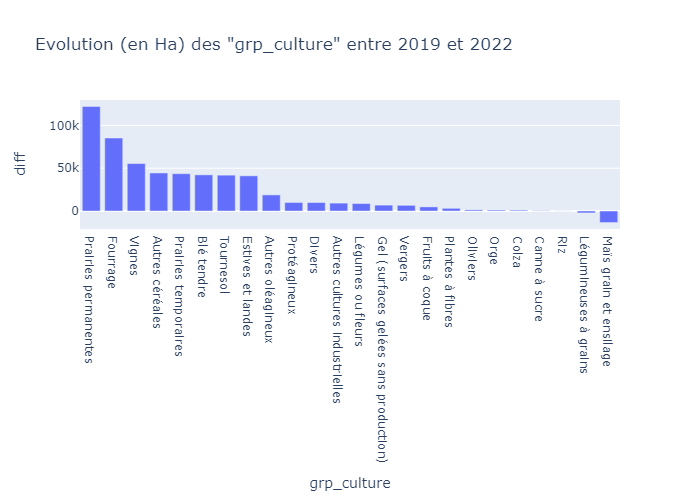

In [88]:
fig = px.bar(
    merged.sort_values('diff', ascending=False),
    x=f'{var}_culture',
    y='diff',
    title=f'Evolution (en Ha) des "{var}_culture" entre 2019 et 2022',
)
fig.show(
#     renderer='png'
)